<a href="https://colab.research.google.com/github/harshithap2000/Obesity-Prediction/blob/main/Obesity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### How can we use health measurements to predict obesity
The dataset provided has two forms of direct/indirect obesity measures. The first is a categorisation (NObeyesdad).
NObesity values are:
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

The second can be done directly via Body Mass Index (BMI) which can be derived from height and weight.


The goal here is to do some data modelling to achieve the following:
- What recommendations would you make to the public to reduce the rate of obesity (backed by evidence)?

#### Metric Descriptions

Other provided metrics include:
Gender, Age

The attributes related with eating habits are:
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC).

The attributes related with the physical condition are:
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

In [ ]:
# pip install pyspark pandas matplotlib seaborn

### 1. Read the dataset

In [ ]:
from pyspark.sql import SparkSession

# Create a data structure whose name is Obesity Predictor
spark = SparkSession.builder.appName("Obesity Predictor").getOrCreate()

# Load files and creating dataframe from the loaded CSV file
df = spark.read.csv("/content/ObesityDataSet.csv", inferSchema=True, header=True)

# Display first 5 rows od df
df.show(5)

# Print schema of df
df.printSchema()

+------+----+------+------+------------------------------+----+----+---+---------+-----+----+---+---+---+----------+--------------------+-------------------+
|Gender| Age|Height|Weight|family_history_with_overweight|FAVC|FCVC|NCP|     CAEC|SMOKE|CH2O|SCC|FAF|TUE|      CALC|              MTRANS|         NObeyesdad|
+------+----+------+------+------------------------------+----+----+---+---------+-----+----+---+---+---+----------+--------------------+-------------------+
|Female|21.0|  1.62|  64.0|                           yes|  no| 2.0|3.0|Sometimes|   no| 2.0| no|0.0|1.0|        no|Public_Transporta...|      Normal_Weight|
|Female|21.0|  1.52|  56.0|                           yes|  no| 3.0|3.0|Sometimes|  yes| 3.0|yes|3.0|0.0| Sometimes|Public_Transporta...|      Normal_Weight|
|  Male|23.0|   1.8|  77.0|                           yes|  no| 2.0|3.0|Sometimes|   no| 2.0| no|2.0|1.0|Frequently|Public_Transporta...|      Normal_Weight|
|  Male|27.0|   1.8|  87.0|                         

Initially, I have imported all the necessary modules from the PySpark library.

A SparkSession object is created, which is the entry point to using Spark functionality.

Next, we use the read method of the SparkSession object to read a CSV file and create a DataFrame.

`inferSchema=True` is used to automatically infer the data types of the columns in the DataFrame, based on the data in the CSV file.

`header=True` is used to indicate that the first row of the CSV file contains the column names.

`show()` is used to show first 5 rows of dataframe, `printSchema()` is used to print the schema of dataframe


### 2. Analyse and visualise the data

In [ ]:
# Importing necessary functions from PySpark SQL module.
import pyspark.sql.functions as F

# Replacing underscores with spaces
df = df.withColumn('NObeyesdad', F.regexp_replace('NObeyesdad', '_', ' '))
df = df.withColumn('MTRANS', F.regexp_replace('MTRANS', '_', ' '))

# Display first 5 rows
df.show(5)

+------+----+------+------+------------------------------+----+----+---+---------+-----+----+---+---+---+----------+--------------------+-------------------+
|Gender| Age|Height|Weight|family_history_with_overweight|FAVC|FCVC|NCP|     CAEC|SMOKE|CH2O|SCC|FAF|TUE|      CALC|              MTRANS|         NObeyesdad|
+------+----+------+------+------------------------------+----+----+---+---------+-----+----+---+---+---+----------+--------------------+-------------------+
|Female|21.0|  1.62|  64.0|                           yes|  no| 2.0|3.0|Sometimes|   no| 2.0| no|0.0|1.0|        no|Public Transporta...|      Normal Weight|
|Female|21.0|  1.52|  56.0|                           yes|  no| 3.0|3.0|Sometimes|  yes| 3.0|yes|3.0|0.0| Sometimes|Public Transporta...|      Normal Weight|
|  Male|23.0|   1.8|  77.0|                           yes|  no| 2.0|3.0|Sometimes|   no| 2.0| no|2.0|1.0|Frequently|Public Transporta...|      Normal Weight|
|  Male|27.0|   1.8|  87.0|                         

I've used `pyspark.sql.functions` module to perform data manipulation operations on df.

This module alters the contents of two columns by substituting underscores with spaces within the dataframe for 'NObeyesdad' and 'MTRANS'.

The `withColumn` method is utilized to update existing column.

I've used `show()` function to display the first five rows of the dataframe.

In [ ]:
from pyspark.sql import functions as F

# Calculate BMI
df = df.withColumn("BMI", F.round(F.col("Weight") / F.pow(F.col("Height"), 2),2))

# Show the updated DataFrame
df.show(5)


+------+----+------+------+------------------------------+----+----+---+---------+-----+----+---+---+---+----------+--------------------+-------------------+-----+
|Gender| Age|Height|Weight|family_history_with_overweight|FAVC|FCVC|NCP|     CAEC|SMOKE|CH2O|SCC|FAF|TUE|      CALC|              MTRANS|         NObeyesdad|  BMI|
+------+----+------+------+------------------------------+----+----+---+---------+-----+----+---+---+---+----------+--------------------+-------------------+-----+
|Female|21.0|  1.62|  64.0|                           yes|  no| 2.0|3.0|Sometimes|   no| 2.0| no|0.0|1.0|        no|Public Transporta...|      Normal Weight|24.39|
|Female|21.0|  1.52|  56.0|                           yes|  no| 3.0|3.0|Sometimes|  yes| 3.0|yes|3.0|0.0| Sometimes|Public Transporta...|      Normal Weight|24.24|
|  Male|23.0|   1.8|  77.0|                           yes|  no| 2.0|3.0|Sometimes|   no| 2.0| no|2.0|1.0|Frequently|Public Transporta...|      Normal Weight|23.77|
|  Male|27.0|   

I've calculated the BMI and added it to the dataframe under the column name BMI.

**BMI: weight (kg) / ([height (m)]^2)<br /><br />**


+-------+------+-----------------+-------------------+------------------+------------------------------+----+------------------+------------------+------+-----+------------------+----+------------------+------------------+------+----------+-------------------+-----------------+
|summary|Gender|              Age|             Height|            Weight|family_history_with_overweight|FAVC|              FCVC|               NCP|  CAEC|SMOKE|              CH2O| SCC|               FAF|               TUE|  CALC|    MTRANS|         NObeyesdad|              BMI|
+-------+------+-----------------+-------------------+------------------+------------------------------+----+------------------+------------------+------+-----+------------------+----+------------------+------------------+------+----------+-------------------+-----------------+
|  count|  2111|             2111|               2111|              2111|                          2111|2111|              2111|              2111|  2111| 2111|   

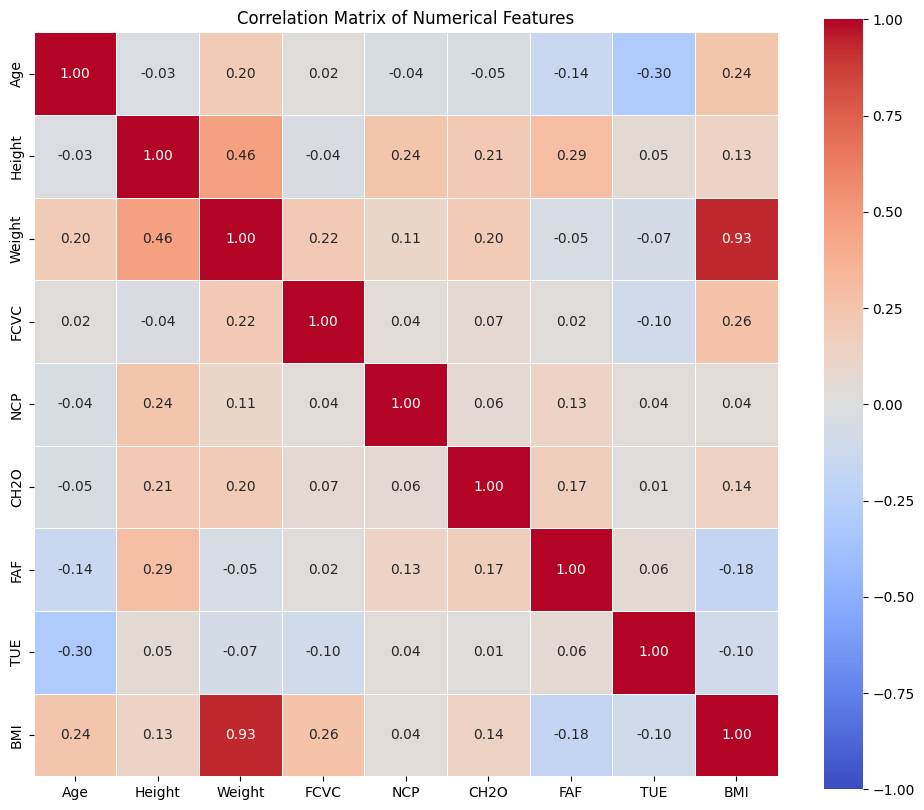

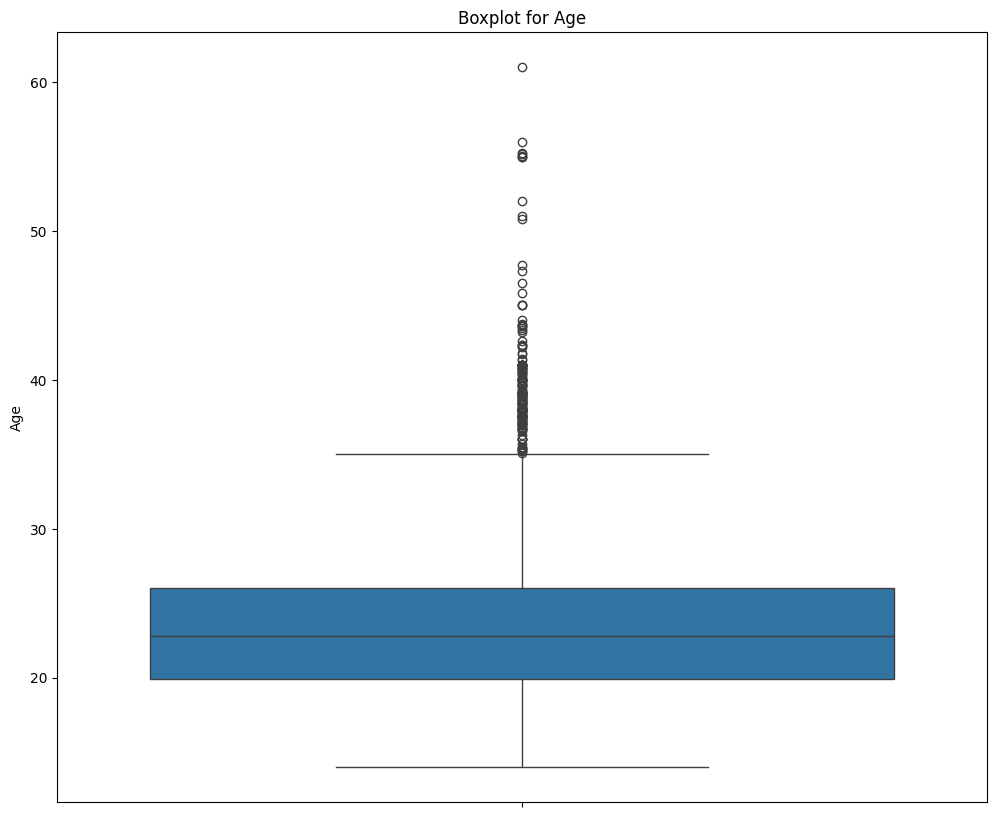

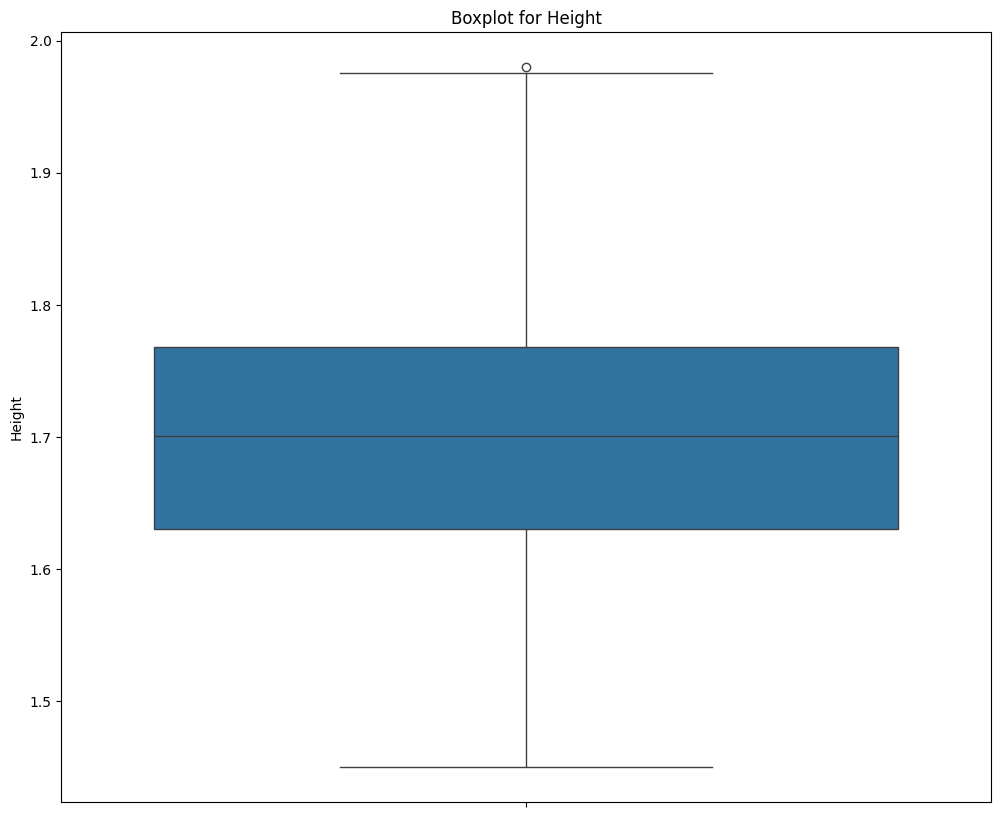

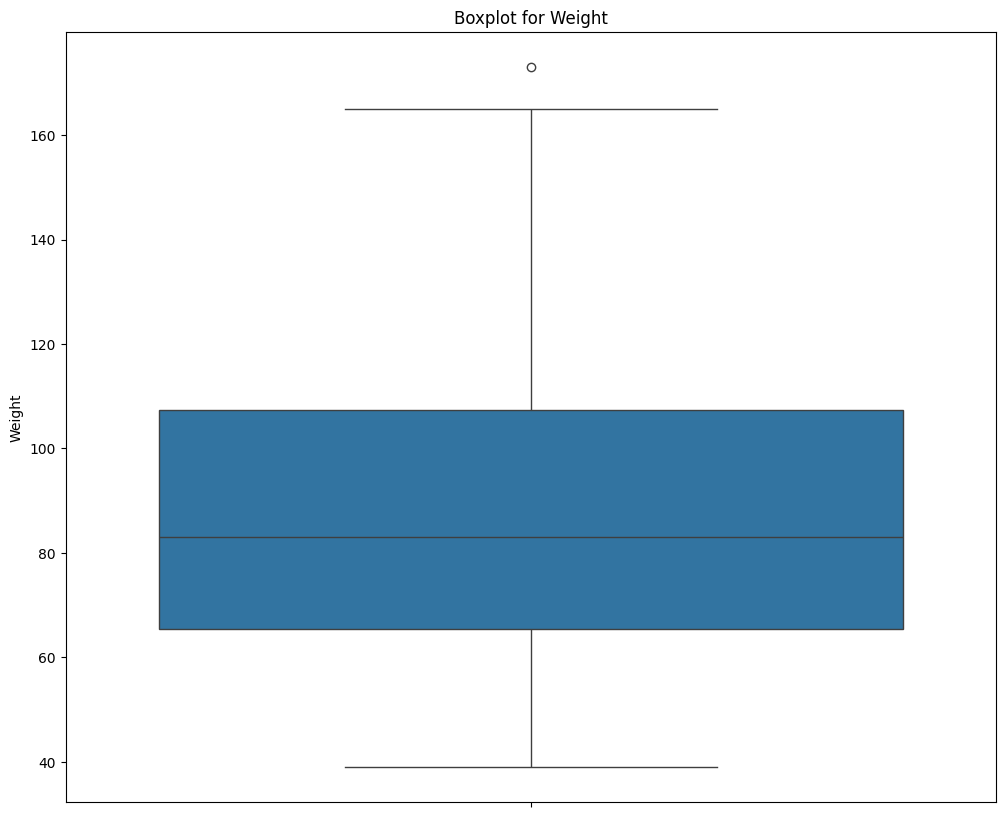

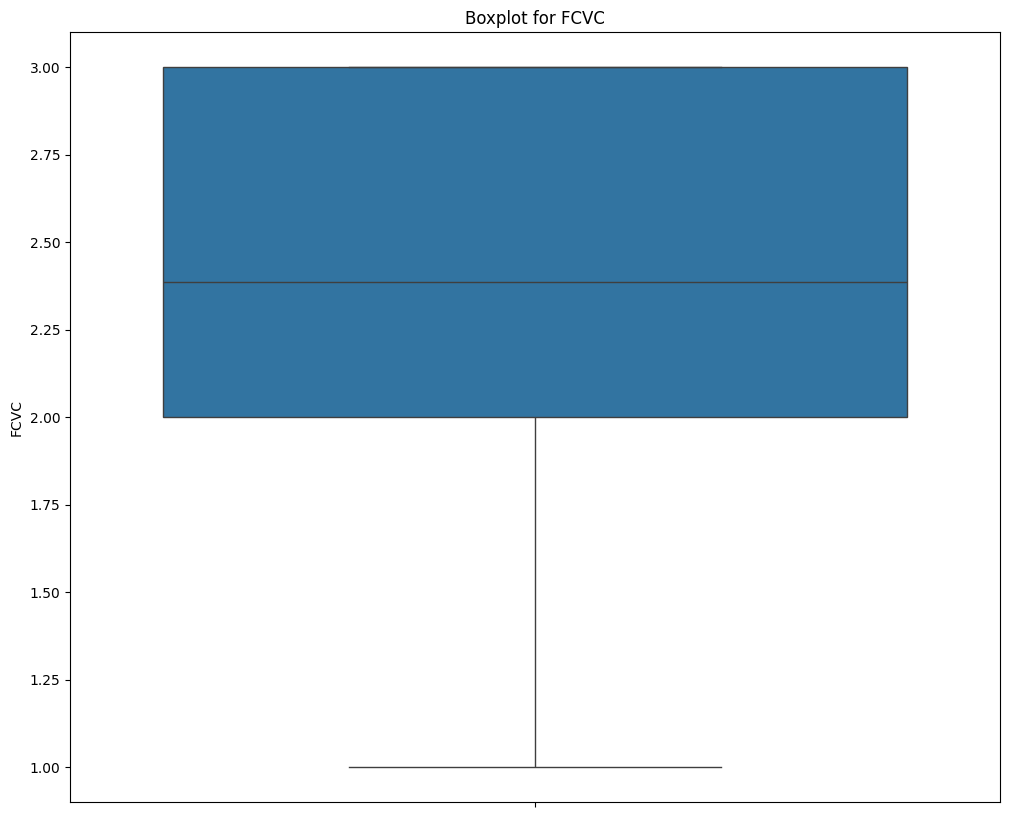

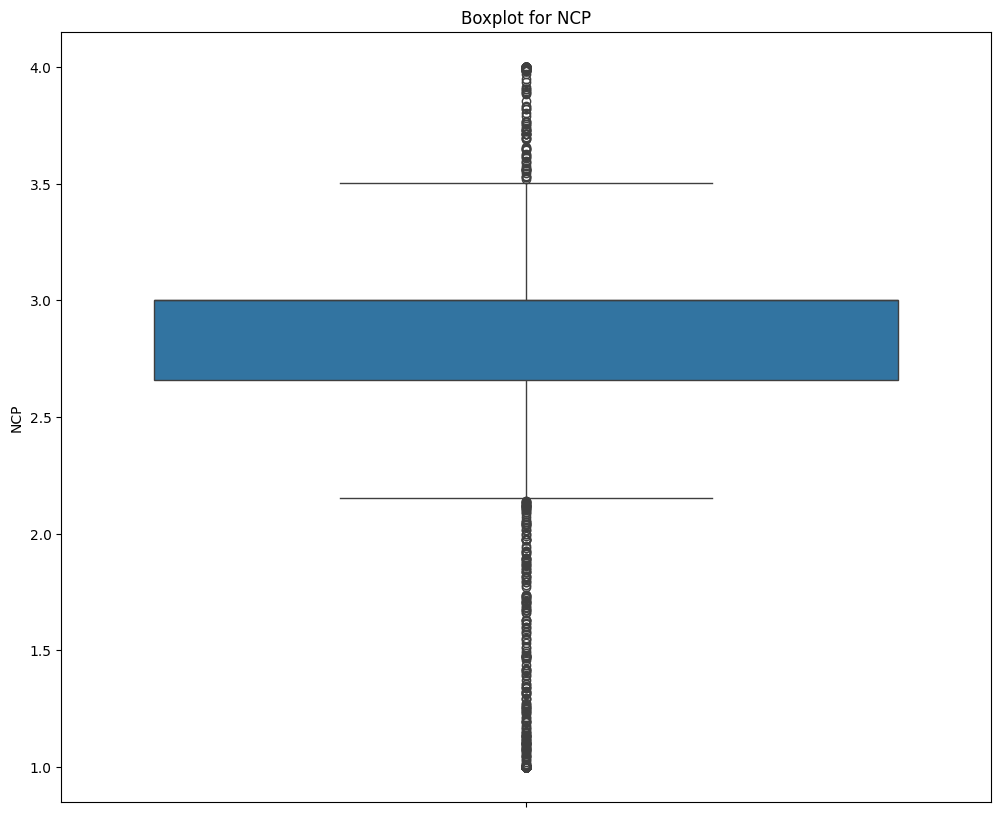

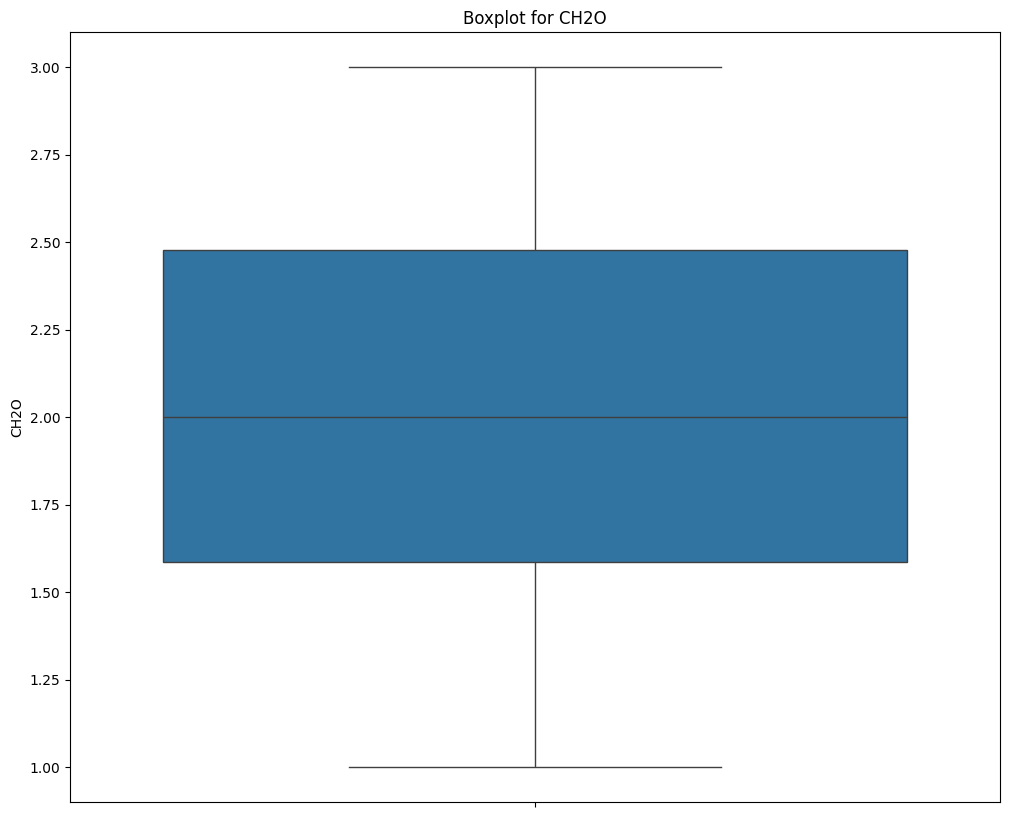

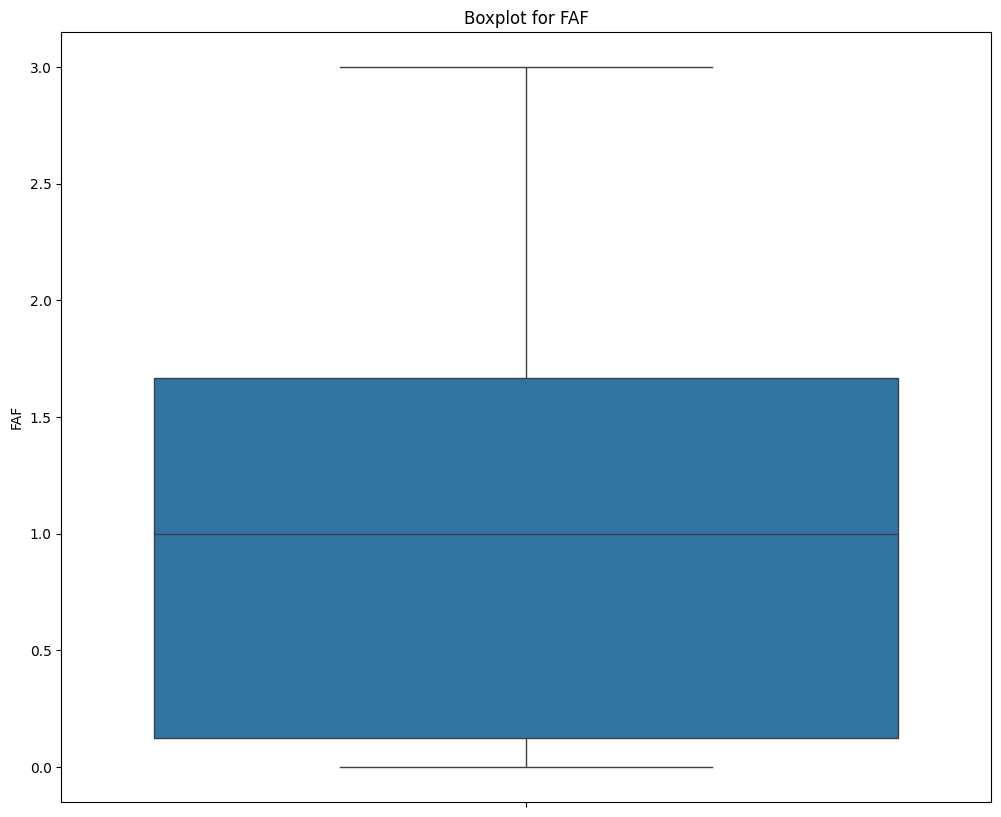

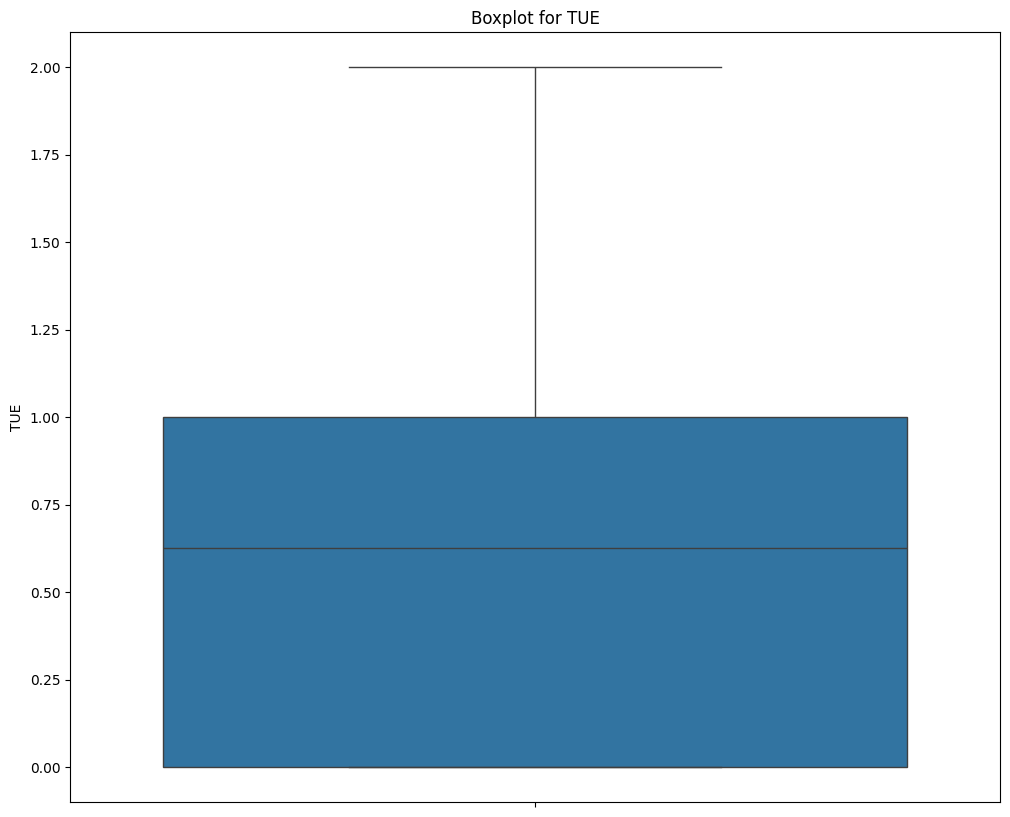

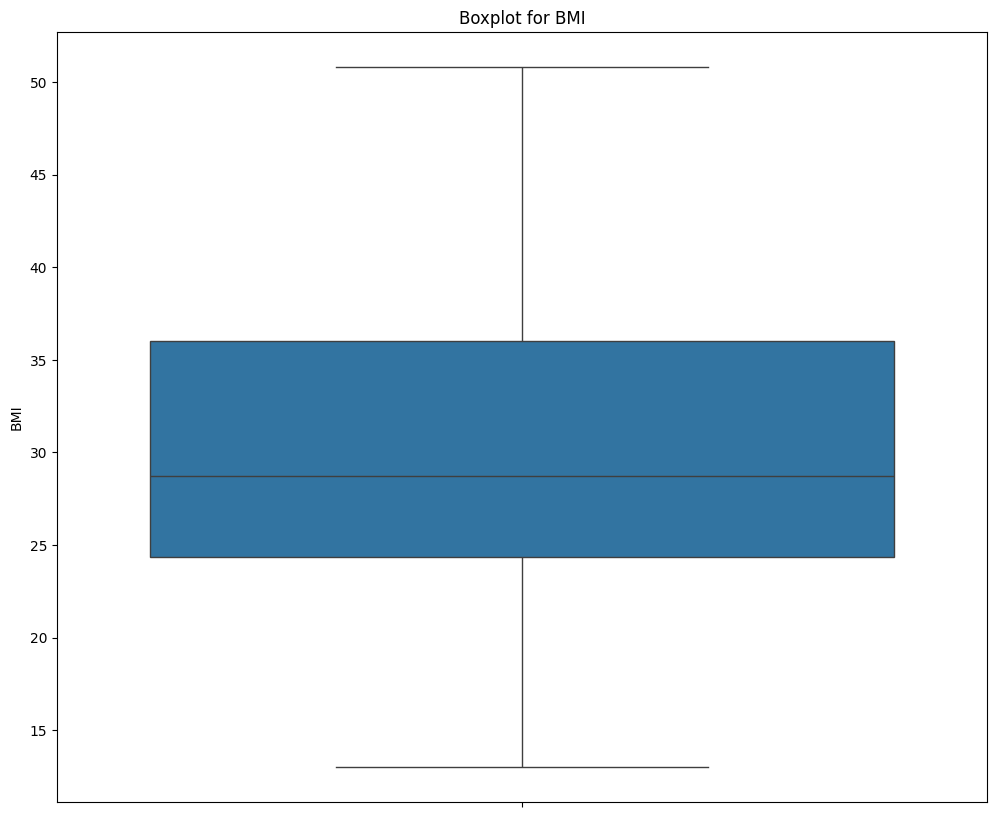

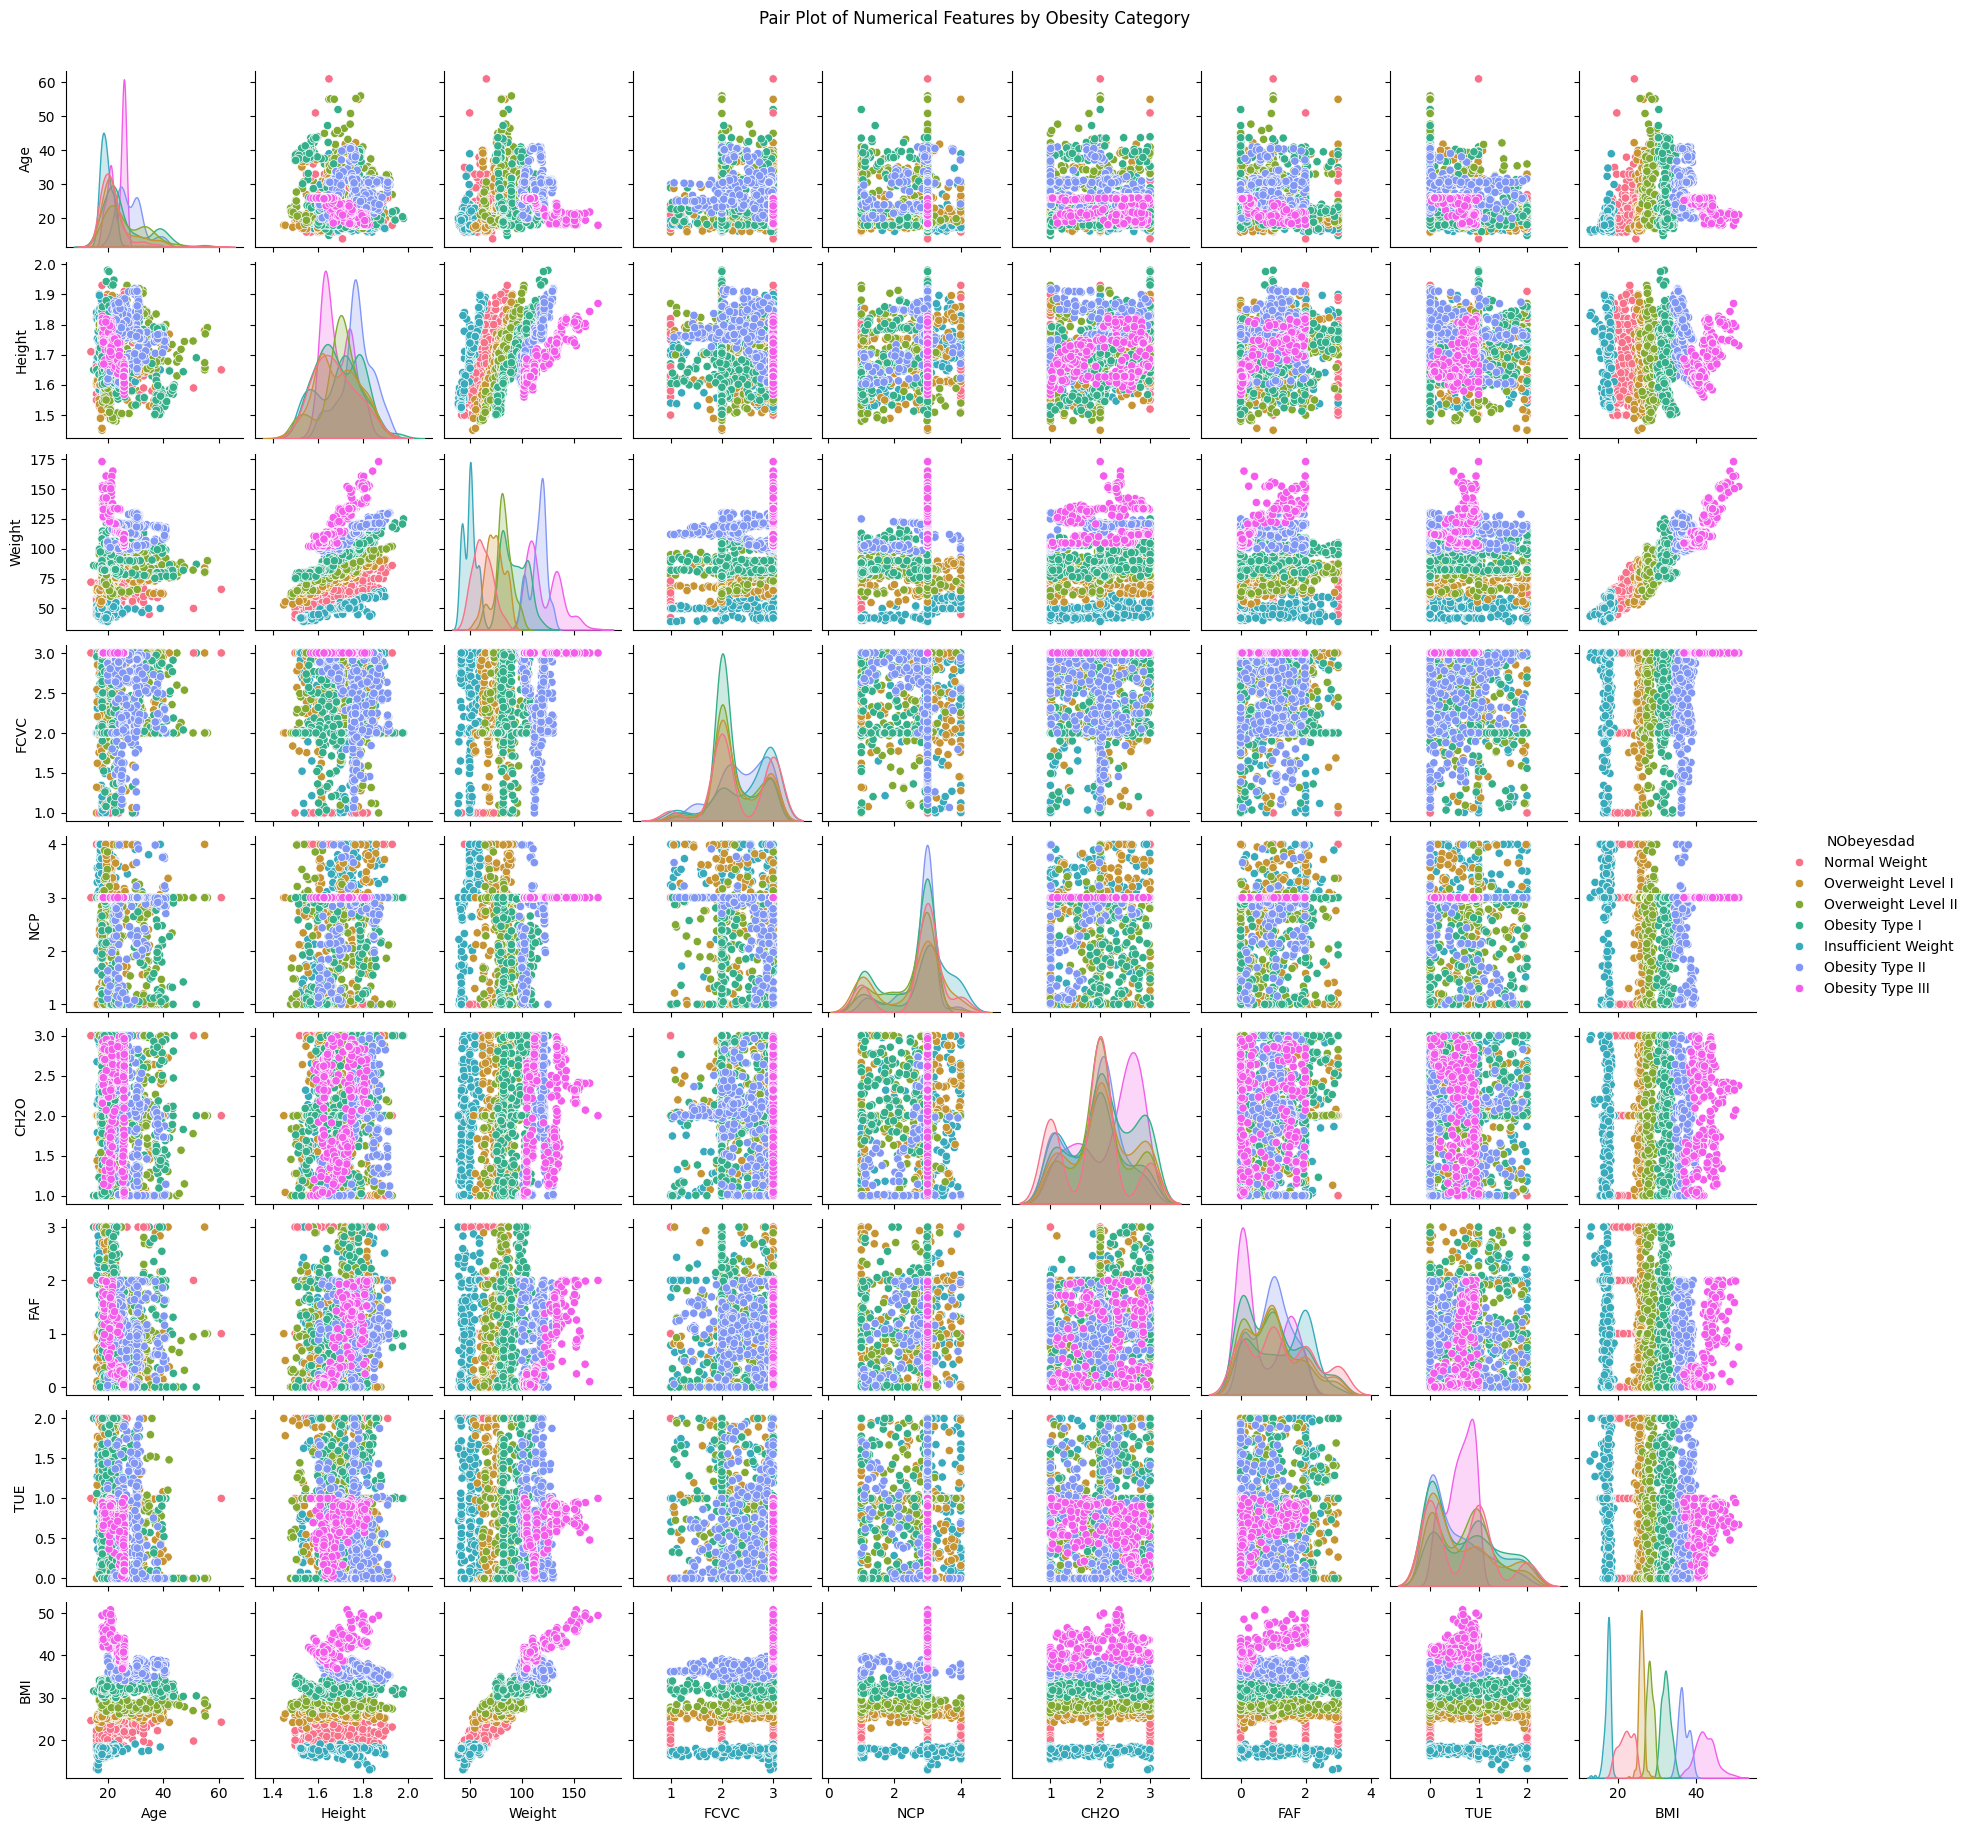

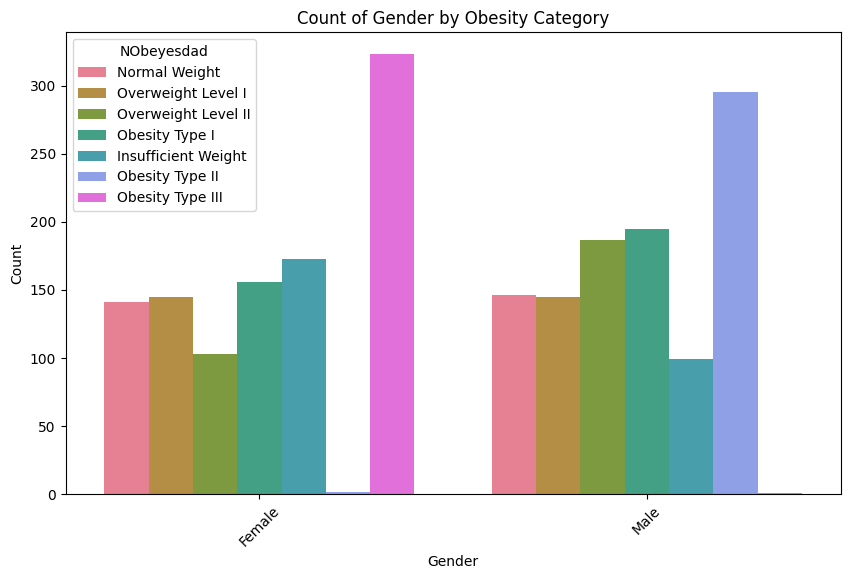

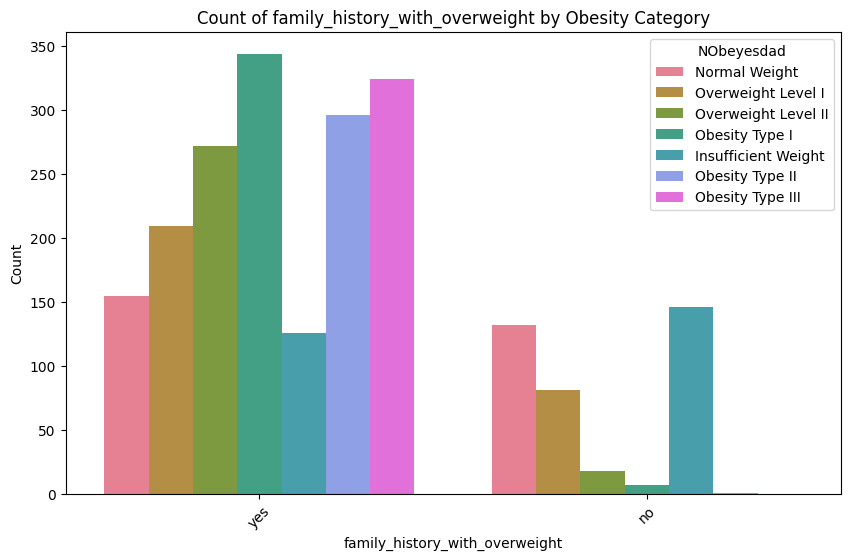

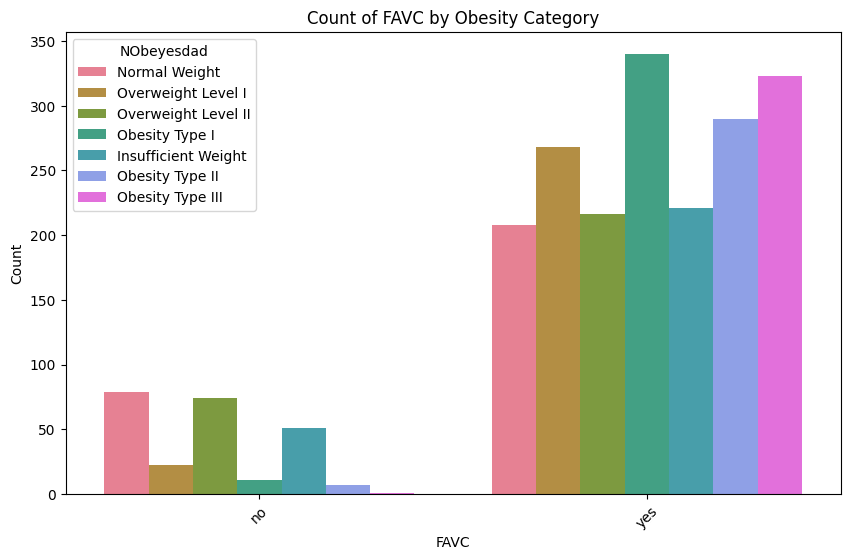

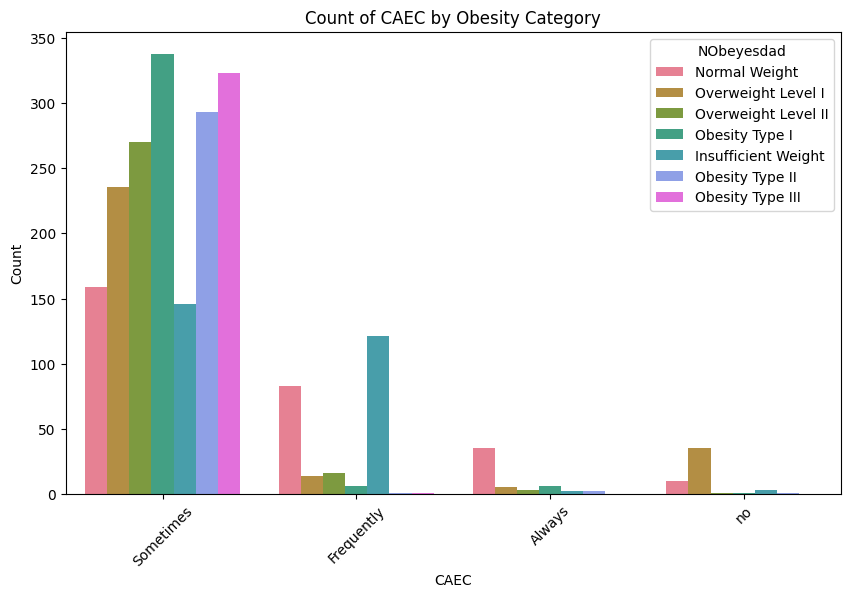

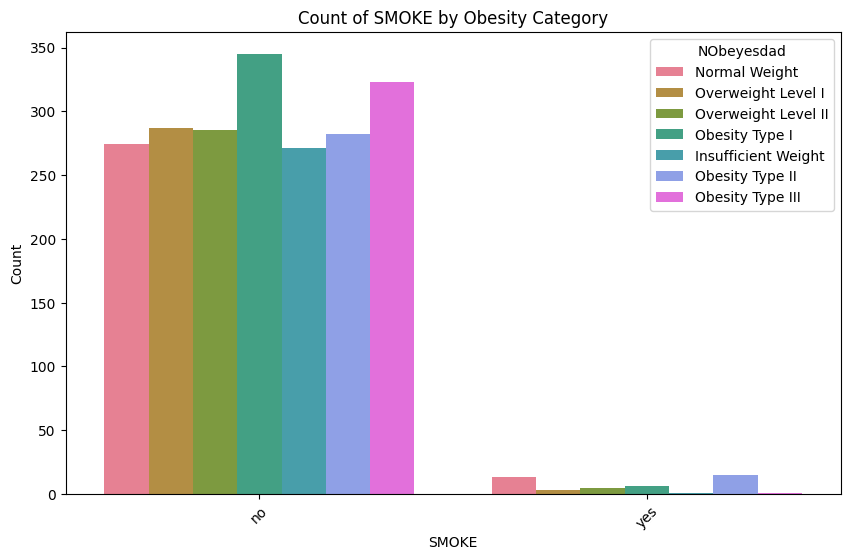

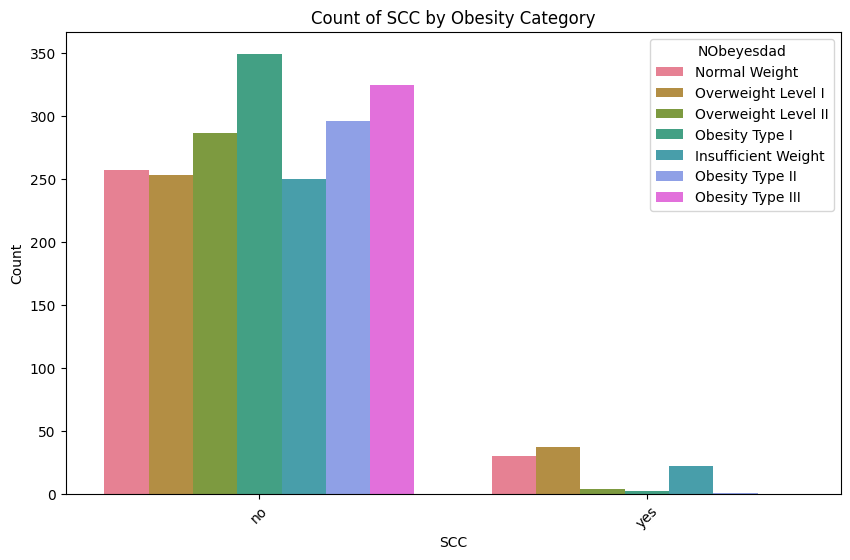

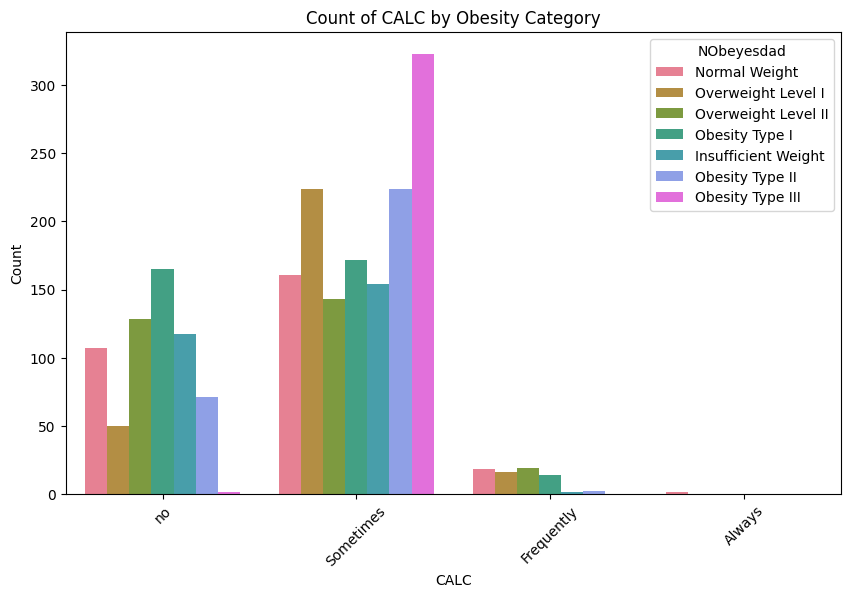

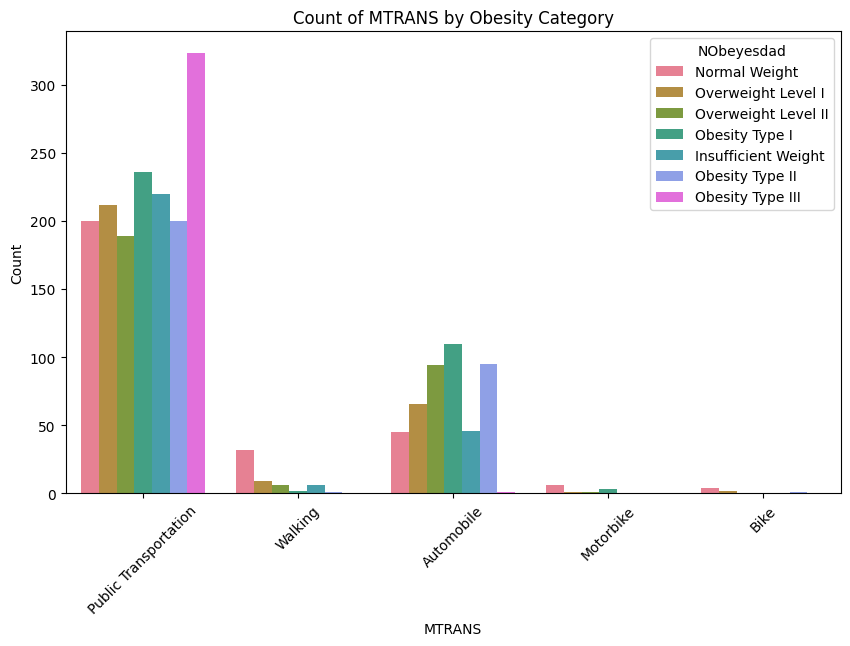

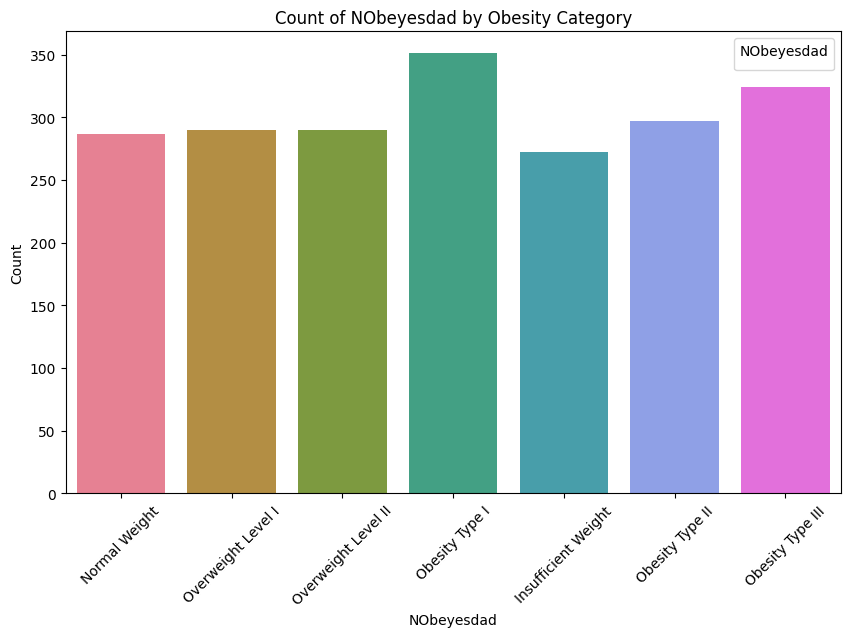

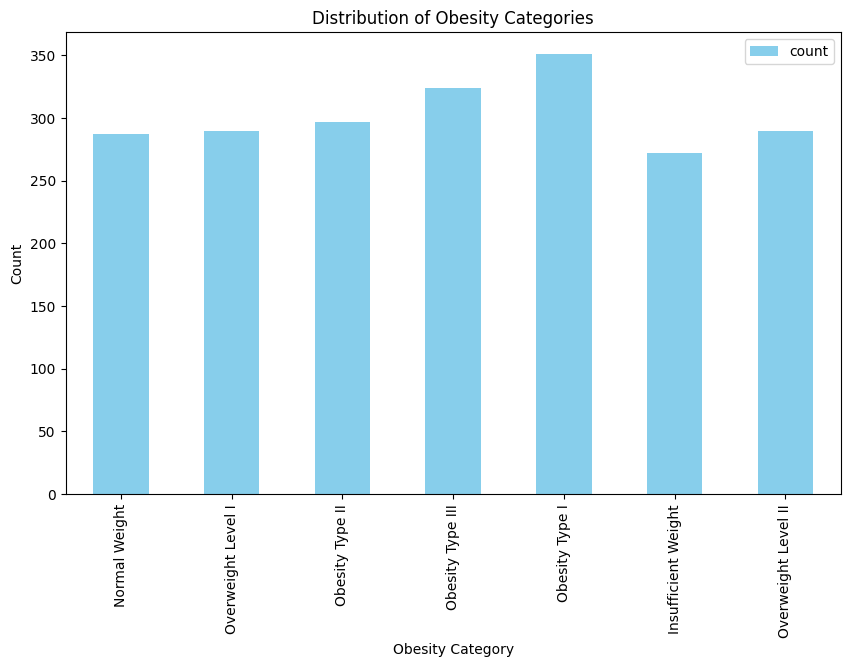

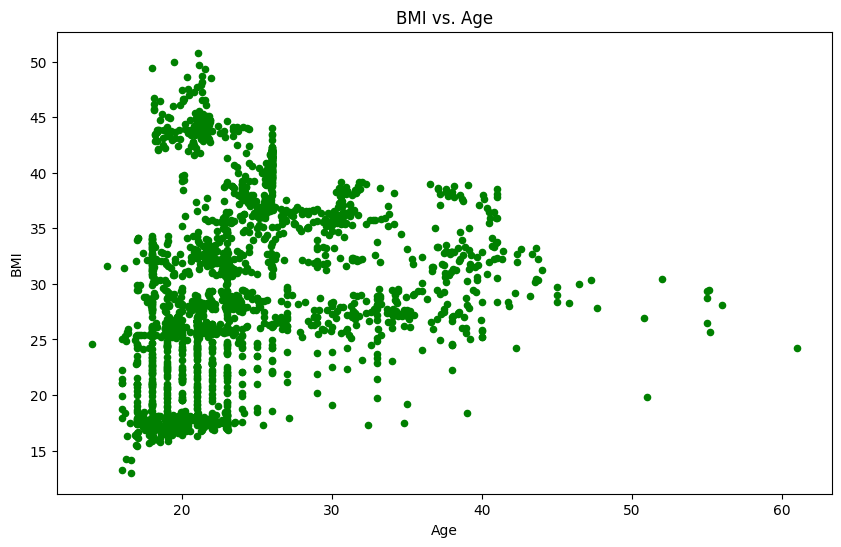

In [ ]:
import pyspark.sql.functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Calculate basic statistics for numerical columns
summary_df = df.describe()
summary_df.show()

# Calculate correlation matrix for numerical columns
correlation_df = df.select(
    F.corr("Age", "Height").alias("Age_Height_corr"),
    F.corr("Age", "Weight").alias("Age_Weight_corr"),
    F.corr("Age", "BMI").alias("Age_BMI_corr"),
    F.corr("Height", "Weight").alias("Height_Weight_corr"),
    F.corr("Height", "BMI").alias("Height_BMI_corr"),
    F.corr("Weight", "BMI").alias("Weight_BMI_corr")
)
correlation_df.show()

numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

# Convert dataframe to RDD of vectors
vector_assembler = VectorAssembler(inputCols=numerical_cols, outputCol="features")
vectorized_df = vector_assembler.transform(df)

# Calculate the correlation matrix
corr_matrix = Correlation.corr(vectorized_df, "features").head()[0]

# Convert the correlation matrix to a Pandas DataFrame
corr_matrix_pd = pd.DataFrame(corr_matrix.toArray(), columns=numerical_cols, index=numerical_cols)

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix_pd,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    square=True,
    vmin=-1.0,
    vmax=1.0,
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


for col_name in numerical_cols:
    # Extract numerical data from DataFrame and convert to Pandas DataFrame
    numerical_data = df.select(col_name).toPandas()

    # Create boxplot
    plt.figure(figsize=(12, 10))
    sns.boxplot(y=numerical_data[col_name])
    plt.title(f"Boxplot for {col_name}")
    plt.show()

# Visualize dependencies between numerical features and the target variable using pair plots
sns.pairplot(df.select(numerical_cols + ["NObeyesdad"]).toPandas(), hue="NObeyesdad", palette="husl", diag_kind="kde", height=2)
plt.suptitle("Pair Plot of Numerical Features by Obesity Category", y=1.02)
plt.show()

# Visualize dependencies between categorical features and the target variable using bar plots
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
for col_name in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col_name, hue="NObeyesdad", data=df.toPandas(), palette="husl")
    plt.title(f"Count of {col_name} by Obesity Category")
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.legend(title="NObeyesdad")
    plt.xticks(rotation=45)
    plt.show()

# Group by the "NObeyesdad" column and count occurrences of each unique value
obesity_counts_df = df.groupBy("NObeyesdad").count()

# Visualize the counts of obesity categories using a bar chart
obesity_counts_df.toPandas().plot(kind="bar", x="NObeyesdad", y="count", figsize=(10, 6), color="skyblue")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.title("Distribution of Obesity Categories")
plt.show()

# Visualize the relationship between BMI and Age using a scatter plot
df.toPandas().plot(kind="scatter", x="Age", y="BMI", figsize=(10, 6), color="green")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("BMI vs. Age")
plt.show()

I've calculated basic statistics for numerical columns using the `describe()` method, which provides insights into the distribution and variability of these features.

I've then computed a correlation matrix for numerical columns to assess the linear relationships between them.

Then pair plots are generated to visualize relationships between numerical features(Age, Weight, Height, BMI) and the target variable, categorized by obesity category.

I've created bar plots to visualize dependencies between categorical features and the target variable, enabling the examination of class distributions within each category.

Furthermore, I've calculated a bar chart which illustrates the distribution of obesity categories based on their occurrence counts.

Lastly, I've calculated a scatter plot that visualizes the relationship between BMI and Age.

In [ ]:
#PREPROCESSING

from pyspark.ml.feature import VectorAssembler, StandardScaler

# Impute missing values with 0
df = df.na.fill(0)

# Convert age, height, weight, and BMI to double
df = df.withColumn("Age", df["Age"].cast("double"))
df = df.withColumn("Height", df["Height"].cast("double"))
df = df.withColumn("Weight", df["Weight"].cast("double"))
df = df.withColumn("BMI", df["BMI"].cast("double"))

# Convert FAVC, NCP, CH2O, FAF, TUE to int
df = df.withColumn("FCVC", df["FCVC"].cast("int"))
df = df.withColumn("NCP", df["NCP"].cast("int"))
df = df.withColumn("CH2O", df["CH2O"].cast("int"))
df = df.withColumn("FAF", df["FAF"].cast("int"))
df = df.withColumn("TUE", df["TUE"].cast("int"))

# Assemble features into a single feature vector column
feature_cols = ["Age", "Height", "Weight", "BMI"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_df = assembler.transform(df)

# Apply StandardScaler to scale the feature vector
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)

# Show the first few rows of the preprocessed DataFrame
scaled_df.show(5)

+------+----+------+------+------------------------------+----+----+---+---------+-----+----+---+---+---+----------+--------------------+-------------------+-----+--------------------+--------------------+
|Gender| Age|Height|Weight|family_history_with_overweight|FAVC|FCVC|NCP|     CAEC|SMOKE|CH2O|SCC|FAF|TUE|      CALC|              MTRANS|         NObeyesdad|  BMI|            features|     scaled_features|
+------+----+------+------+------------------------------+----+----+---+---------+-----+----+---+---+---+----------+--------------------+-------------------+-----+--------------------+--------------------+
|Female|21.0|  1.62|  64.0|                           yes|  no|   2|  3|Sometimes|   no|   2| no|  0|  1|        no|Public Transporta...|      Normal Weight|24.39|[21.0,1.62,64.0,2...|[3.30918767541353...|
|Female|21.0|  1.52|  56.0|                           yes|  no|   3|  3|Sometimes|  yes|   3|yes|  3|  0| Sometimes|Public Transporta...|      Normal Weight|24.24|[21.0,1.52,56

I've used `na.fill()` to replace missing values with zeroes.

Next, I've converted certain columns such as 'Age', 'Height', 'Weight', and 'BMI' to double data type for numerical consistency.

Similarly, I've converted other columns like 'FCVC', 'NCP', 'CH2O', 'FAF', and 'TUE' are to integer data type using the `withColumn()` method.

Subsequently, I've assembled features into a single vector column named 'features' using the `VectorAssembler` class.

Finally, I've scaled the feature vector using the `StandardScaler` to normalize the data.


ANALYSIS IF THE

### 3. Organise the data for modelling

In [ ]:
# Extract the column names of numeric features with double data type
numeric_features = [t[0] for t in df.dtypes if t[1] == 'double']

# Print prediction features
print("Prediction Features")
print(numeric_features)

# Calculate descriptive statistics for numeric features and transpose
test1 = df.select(numeric_features).describe().toPandas().transpose()
print(test1)

# Initialise  VectorAssembler to combine selected numeric features into a single feature vector
from pyspark.ml.feature import VectorAssembler
numericCols = ['Age', 'Height', 'Weight', 'BMI']
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")

# Transform df by adding a new column "features"
df = assembler.transform(df)
df.show(5)

# Encode the categorical target variable 'NObeyesdad' into numerical labels
from pyspark.ml.feature import StringIndexer
label_stringIdx = StringIndexer(inputCol='NObeyesdad', outputCol='labelIndex')
df = label_stringIdx.fit(df).transform(df)
df.show(5)

# Split data
train, test = df.randomSplit([0.7, 0.3], seed = 2018)

# Printing count of records in the training and test
print("Training Dataset Count: ", str(train.count()))
print("Test Dataset Count: ", str(test.count()))

Prediction Features
['Age', 'Height', 'Weight', 'BMI']
             0                   1                    2     3      4
summary  count                mean               stddev   min    max
Age       2111   24.31259990857412    6.345968273732226  14.0   61.0
Height    2111  1.7016773533870178  0.09330481986792012  1.45   1.98
Weight    2111   86.58605812648037   26.191171745204706  39.0  173.0
BMI       2111    29.7001373756514    8.011354438153752  13.0  50.81
+------+----+------+------+------------------------------+----+----+---+---------+-----+----+---+---+---+----------+--------------------+-------------------+-----+--------------------+
|Gender| Age|Height|Weight|family_history_with_overweight|FAVC|FCVC|NCP|     CAEC|SMOKE|CH2O|SCC|FAF|TUE|      CALC|              MTRANS|         NObeyesdad|  BMI|            features|
+------+----+------+------+------------------------------+----+----+---+---------+-----+----+---+---+---+----------+--------------------+-------------------+----

I extracted the numeric features from the DataFrame by filtering columns with a data type of `'double'`.

Descriptive statistics were computed for the numeric features using the `describe()` method, and the result was transposed for better readability.

To prepare the data for machine learning algorithms, I used `VectorAssembler` to combine the numeric features into a single feature vector named "features".

As the target variable "NObeyesdad" was categorical, I utilized `StringIndexer` to convert it into numerical labels, creating a new column named "labelIndex".

Finally, I split the DataFrame into training and test sets using `randomSplit()`, with 70% of the data allocated for training and 30% for testing.


### 4. Implement prediction models

In [ ]:
# Logistic Regression

from pyspark.ml.classification import LogisticRegression

# Define the Linear Regression model
lr = LogisticRegression(featuresCol='features', labelCol='labelIndex')

The line `lr = LogisticRegression(featuresCol='features', labelCol='labelIndex')` initializes a logistic regression model for classification.

In this model, the `featuresCol` parameter is set to 'features', indicating the input features column, while the `labelCol` parameter is set to 'labelIndex', indicating the column containing the label or target variable.

In [ ]:
# Rain Forest Classifier

from pyspark.ml.classification import RandomForestClassifier

# Define the Random Forest model
rf = RandomForestClassifier(featuresCol='features', labelCol='labelIndex')


The line `rf = RandomForestClassifier(featuresCol='features', labelCol='labelIndex')` creates a Random Forest classifier model.

This model is configured to use the `features` column as input features and the `labelIndex` column as the target variable for classification.

### 5. Train prediction models

In [ ]:
#LOGISTIC REGRESSION

# Train the model
lr_model = lr.fit(train)

The line `lr_model = lr.fit(train)` trains the logistic regression model using the training dataset.

The `fit()` method applies the logistic regression algorithm to the training data specified by the `train` variable, resulting in a trained logistic regression model stored in the `lr_model` variable.

In [ ]:
#RANDOM FOREST CLASSIFIER

# Train the model
rf_model = rf.fit(train)

The line `rf_model = rf.fit(train)` trains the random forest classifier model using the training dataset.

The `fit()` method applies the random forest algorithm to the training data specified by the `train` variable, resulting in a trained random forest model stored in the `rf_model` variable.

### 6. Test prediction models and show results

In [ ]:
# Logistic Regression

from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions on the test set
lr_predictions = lr_model.transform(test)

# Show some of the predictions
lr_predictions.select('Age', 'Height', 'Weight', 'BMI', 'labelIndex', 'prediction').show(25)

# Show the label index and predicted value
lr_predictions.select('labelIndex', 'prediction').show(10)

+---------+--------+---------+-----+----------+----------+
|      Age|  Height|   Weight|  BMI|labelIndex|prediction|
+---------+--------+---------+-----+----------+----------+
|     15.0|    1.65|     86.0|31.59|       0.0|       0.0|
|16.129279|    1.65|85.583485|31.44|       0.0|       0.0|
|16.270434|1.818268|47.124717|14.25|       6.0|       6.0|
| 16.30687|1.616366|67.183128|25.71|       3.0|       3.0|
|16.613108|1.777929|44.762023|14.16|       6.0|       6.0|
|16.910997| 1.74823|49.928447|16.34|       6.0|       6.0|
|16.950499|1.603501|     65.0|25.28|       3.0|       3.0|
|     17.0|    1.63|     65.0|24.46|       5.0|       5.0|
|     17.0|     1.7|     56.0|19.38|       5.0|       5.0|
|     17.0|     1.7|     85.0|29.41|       4.0|       4.0|
|     17.0|     1.8|     50.0|15.43|       6.0|       6.0|
| 17.08525|1.535618|57.259124|24.28|       3.0|       5.0|
|17.402028|1.710756|     50.0|17.08|       6.0|       6.0|
|17.420269|1.489409|53.620604|24.17|       3.0|       5.

I applied a logistic regression model (`lr_model`) to generate predictions on the test dataset (`test`).

Upon transforming the test data with the trained model, I obtained a dataframe named `lr_predictions`.

This dataframe has original features such as Age, Height, Weight, and BMI, along with the actual label index (`labelIndex`) and the predicted label (`prediction`).

To evaluate the model's performance, I displayed a subset of the `lr_predictions` dataframe using the `show()` method with 25 rows.

In [ ]:
# Random Forest Classifier

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Make predictions on the test set
rf_predictions = rf_model.transform(test)

rf_predictions.select('Age', 'Height', 'Weight', 'BMI', 'labelIndex', 'rawPrediction', 'prediction', 'probability').show(25)

# Show the label index and predicted class
rf_predictions.select('labelIndex', 'prediction').show(10)


+---------+--------+---------+-----+----------+--------------------+----------+--------------------+
|      Age|  Height|   Weight|  BMI|labelIndex|       rawPrediction|prediction|         probability|
+---------+--------+---------+-----+----------+--------------------+----------+--------------------+
|     15.0|    1.65|     86.0|31.59|       0.0|[14.8950520049824...|       0.0|[0.74475260024912...|
|16.129279|    1.65|85.583485|31.44|       0.0|[14.8950520049824...|       0.0|[0.74475260024912...|
|16.270434|1.818268|47.124717|14.25|       6.0|[0.0,0.0,0.0,0.0,...|       6.0|[0.0,0.0,0.0,0.0,...|
| 16.30687|1.616366|67.183128|25.71|       3.0|[0.64377217384292...|       3.0|[0.03218860869214...|
|16.613108|1.777929|44.762023|14.16|       6.0|[0.0,0.0,0.0,0.0,...|       6.0|[0.0,0.0,0.0,0.0,...|
|16.910997| 1.74823|49.928447|16.34|       6.0|[0.0,0.0,0.0,0.0,...|       6.0|[0.0,0.0,0.0,0.0,...|
|16.950499|1.603501|     65.0|25.28|       3.0|[0.32478632478632...|       3.0|[0.016239316

I utilized a trained random forest classifier model (`rf_model`) to generate predictions on the test dataset (`test`).

Upon applying the model to the test data, I obtained a dataframe named `rf_predictions`.

This dataframe includes Age, Height, Weight, and BMI, representing the original features, along with the actual label index (`labelIndex`), the raw prediction (`rawPrediction`), the predicted class (`prediction`), and the probability distribution (`probability`) for each class.

To evaluate the model's predictions, I displayed a subset of the `rf_predictions` dataframe using the `show()` method with 25 rows.

### 7. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

In [ ]:
# Logistic Regression

# Import necessary modules for evaluation
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

# Create an evaluator for multiclass classification
evaluator = MulticlassClassificationEvaluator(labelCol="labelIndex", predictionCol="prediction")

# Evaluate the accuracy
accuracy = evaluator.evaluate(lr_predictions)

# Print the accuracy and test error
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))

# Separate out the predicted labels and actual label indices
preds_and_labels = lr_predictions.select(['prediction','labelIndex']).withColumn('labelIndex', F.col('labelIndex').cast(FloatType())).orderBy('prediction')
preds_and_labels = preds_and_labels.select(['prediction','labelIndex'])

# Compute confusion matrix using MulticlassMetrics
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))

# Print the confusion matrix as an array
print(metrics.confusionMatrix().toArray())

Accuracy = 0.9448282516236328
Test Error = 0.05517174837636718


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


[[ 97.   0.   0.   0.   0.   0.   0.]
 [  0. 100.   6.   0.   0.   0.   0.]
 [  1.  10.  69.   0.   0.   0.   0.]
 [  0.   0.   0.  75.   2.   3.   0.]
 [  3.   0.   0.   6.  73.   0.   0.]
 [  0.   0.   0.   0.   0.  80.   2.]
 [  0.   0.   0.   0.   0.   0.  76.]]


I utilized the `MulticlassClassificationEvaluator` from PySpark's ML library to evaluate the performance of the logistic regression model (`lr_model`).

By specifying the `labelCol` as "labelIndex" and the `predictionCol` as "prediction", I instantiated an evaluator object. Subsequently, I used this evaluator to compute the accuracy of the model's predictions on the test dataset (`lr_predictions`). The computed accuracy score is 0.9448282516236328 and the test score is 0.05517174837636718.

I employed the `MulticlassMetrics` class from PySpark's MLlib library. This class facilitates the computation of various metrics including confusion matrix statistics.

I extracted the predicted labels and actual labels from the `lr_predictions` dataframe and casted the "labelIndex" column to FloatType. After ordering the predictions by their predicted labels, I selected only the "prediction" and "labelIndex" columns for further analysis.

By passing the predictions and labels as tuples to `MulticlassMetrics`, I obtained a confusion matrix, which was converted into a NumPy array and printed for examination. This matrix provides a comprehensive overview of the model's performance across different classes.

In [ ]:
# Rain Forest Classifier

# Import necessary modules for evaluation
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

# Create an evaluator for multiclass classification
evaluator = MulticlassClassificationEvaluator(labelCol="labelIndex", predictionCol="prediction")

# Evaluate the accuracy
accuracy = evaluator.evaluate(rf_predictions)

# Print the accuracy and test error
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))

# Separate out the predicted labels and actual label indices
preds_and_labels = rf_predictions.select(['prediction','labelIndex']).withColumn('labelIndex', F.col('labelIndex').cast(FloatType())).orderBy('prediction')
preds_and_labels = preds_and_labels.select(['prediction','labelIndex'])

# Compute confusion matrix using MulticlassMetrics
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))

# Print the confusion matrix as an array
print(metrics.confusionMatrix().toArray())

Accuracy = 0.9397355665225862
Test Error = 0.06026443347741384
[[ 96.   0.   1.   0.   0.   0.   0.]
 [  0. 106.   0.   0.   0.   0.   0.]
 [  1.  10.  69.   0.   0.   0.   0.]
 [  0.   0.   0.  73.   3.   4.   0.]
 [  7.   0.   0.   5.  70.   0.   0.]
 [  0.   0.   0.   3.   0.  79.   0.]
 [  0.   0.   0.   0.   0.   2.  74.]]


I used PySpark's `MulticlassClassificationEvaluator` to evaluate the performance of the Random Forest classifier model (`rf_model`).

After instantiating the evaluator object with the appropriate `labelCol` and `predictionCol`, I calculated the accuracy of the model's predictions on the test dataset (`rf_predictions`). The accuracy score is 0.9397355665225862 and test score is 0.06026443347741384.

To delve deeper into the model's performance across multiple classes, I utilized the `MulticlassMetrics` class from PySpark's MLlib library.

Initially, I extracted the predicted labels and actual labels from the `rf_predictions` dataframe, ensuring that the "labelIndex" column was casted to FloatType. I then ordered the predictions by their predicted labels and selected only the "prediction" and "labelIndex" columns for further processing.

By passing the predictions and labels as tuples to `MulticlassMetrics`, I obtained a confusion matrix. This matrix was converted into a NumPy array and printed, providing detailed insights into the model's performance across different classes, aiding in the evaluation of its classification accuracy and effectiveness.


**Choice of model**

---



Upon comparing the results of logistic regression and random forest classifier models, I find that the logistic regression model exhibits a slightly higher accuracy of 94.48% compared to the random forest classifier's accuracy of 93.97%. Despite the marginal difference in accuracy, logistic regression presents itself as the preferred choice due to its simplicity and interpretability.

Logistic regression offers coefficient estimates for each feature, enabling a clear understanding of the relationship between predictors and the target variable. This interpretability is crucial in domains where the explanation of model predictions is imperative for decision-making or model deployment.

Therefore, considering its slightly superior performance and interpretability, I recommend employing the logistic regression model for this classification task.

### 8. Describe appropriate recommendations

Based on the analysis, it's evident that dietary habits, family history, physical activity, technology use, and alcohol consumption significantly influence obesity levels.

To address these factors, I recommend the following targeted strategies:

1. Firstly, health agencies/ govenment must launch public campaigns emphasizing the importance of balanced diets, with a focus on increasing vegetable intake and reducing consumption of high-calorie foods.

2. Secondly, they must develop educational materials to inform the public about the genetic predisposition to obesity, encouraging individuals to be mindful of their family history and make informed lifestyle choices.
3. Thirdly, they must implement community-based programs to promote regular physical activity, targeting sedentary individuals and encouraging them to engage in exercise routines suited to their fitness levels.
4. Additionally, they must raise awareness about the negative impact of excessive screen time on obesity risk, advocating for moderate technology use and promoting alternative activities that involve movement.
5. Furthermore, they must launch campaigns to educate individuals about the caloric content of alcoholic beverages and the potential link between alcohol consumption and weight gain, encouraging moderation.
6. Moreover, they must invest in mobile applications and online platforms that provide personalized diet and exercise plans, real-time progress tracking, and educational resources to support individuals in managing their weight effectively.
7. Finally, they must foster collaborations with healthcare providers, fitness centers, and community organizations to expand the reach of obesity prevention initiatives and provide ongoing support for weight management.

By implementing these targeted strategies, tailored to address specific factors influencing obesity, governments and health agencies can develop effective interventions to combat this public health issue.

### 9. Reflect on what you have learned by completing this assignment

Through completing this assignment, I have gained a deeper understanding of the process involved in analyzing data, building machine learning models, and deriving meaningful insights from the results.

Specifically, I have learned how to use PySpark for data preprocessing, model training, and evaluation.

Going in depth, I would like to start off with data preprocessing. Here I've learnt to handle missing values, to ensure data consistency, and tried my hands on feature engineering using techniques such as VectorAssembler and StringIndexer. This knowledge has enabled me to prepare data effectively for model training and evaluation.

Moreover, I have gained hands-on experience in training and evaluating classification models like Logistic Regression and Random Forest Classifier. By comparing model performance metrics such as accuracy and confusion matrix, I have developed a keen understanding of model selection and evaluation criteria.

Additionally, I have refined my ability to interpret model outputs and derive actionable insights from the analysis results. Clear and concise communication of findings, through both code documentation and analysis summaries, has become a key aspect of my analytical process.

### 10. References

1.  https://spark.apache.org/docs/
2. https://pandas.pydata.org/docs/reference/index.html
3. https://seaborn.pydata.org/api.html
4. https://matplotlib.org/stable/api/index.html
5. https://scikit-learn.org/stable/modules/classes.html
6. https://numpy.org/doc/stable/reference/


